# ITK in Python

# python使用ITK

### Learning Objectives

* Learn how to write simple Python code with ITK
* Become familiar with the functional and object-oriented interfaces to ITK in Python
* Understand how to bridge ITK with machine learning libraries with [NumPy](https://numpy.org/)

### 学习目标

* 学习如何使用ITK写简单的python代码
* 熟悉python的ITK接口，对象
* 了解如何将ITK与机器学习库通过[NumPy](https://numpy.org/)连接起来。

# Working with NumPy and friends

* ITK is great at reading and processing images
* Some algorithms are not available in ITK
* NumPy is great at processing arrays in simple ways
* NumPy arrays can be read by many other Python packages
    * [matplotlib](https://matplotlib.org)
    * [scikit-learn](https://scikit-learn.org)
    * [PyTorch](https://pytorch.org)
    * [TensorFlow](https://www.tensorflow.org)
    * [scikit-image](https://scikit-image.org)
    * [OpenCV](https://opencv.org)
    
# 与NumPy和朋友一起工作

* ITK擅长用来读取和处理影像
* 一些算法没有包含在ITK中
* NumPy擅长用简单的方式处理数组
* NumPy数组能够被其他很多的Python包使用：
    * [matplotlib](https://matplotlib.org)
    * [scikit-learn](https://scikit-learn.org)
    * [PyTorch](https://pytorch.org)
    * [TensorFlow](https://www.tensorflow.org)
    * [scikit-image](https://scikit-image.org)
    * [OpenCV](https://opencv.org)

In [1]:
import itk
from itkwidgets import view

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image = itk.imread("data/KitwareITK.jpg")
view(image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageRGBUC2; pro…

In [3]:
array = itk.array_from_image(image)
print(array[1,1])

[51 56 60]


Let go the other way around: NumPy array to an ITK image. First, we create an array with some values.

实现将NumPy数组转换成ITK图像。首先创建一个数组。

In [4]:
def make_gaussian(size, fwhm=3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be considered an effective radius.
    """

    x = np.arange(0, size, 1, np.float32)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)


array = make_gaussian(11)

Let's look at the array. We use `matplotlib` or `itkwidgets.view` to do this.

(-0.5, 10.5, 10.5, -0.5)

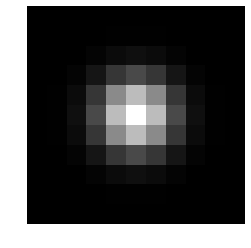

In [5]:
plt.gray()
plt.imshow(array)
plt.axis('off')

In [6]:
image = itk.image_from_array(array)
view(image, cmap='Grayscale', interpolation=False)

Viewer(cmap='Grayscale', geometries=[], gradient_opacity=0.22, interpolation=False, point_sets=[], rendered_im…

## Exercises

## 练习

### Exercise 1: Visualize an image
* Read an image with ITK
* Apply a filter
* Show both original image and filtered images with matplotlib

### 练习1：显示一张图
* 使用ITK读取一张图
* 进行滤波
* 使用matplotlib显示原始图像和滤波后的图像

In [7]:
image = itk.imread('data/CBCT-TextureInput.png', itk.F)

In [8]:
# %load solutions/2_ITK_in_Python_answers_Exercise1.py

好吧，既然要进行滤波，那么就先查一下，itk有哪些滤波方法吧，直接百度或bing检索“ITK filter”。找到：https://itk.org/Doxygen/html/group__ImageFilters.html 

就简单的选择一个中值滤波吧。

In [9]:
itk.MedianImageFilter?

(-0.5, 10.5, 10.5, -0.5)

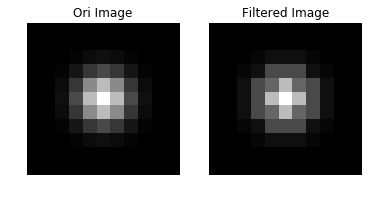

In [14]:
image_filtered = itk.MedianImageFilter(image)
image_ori = itk.array_from_image(image) # 原始图像
image_filtered = itk.array_from_image(image_filtered) # 滤波后的图像

plt.subplot(1,2,1)
plt.imshow(image_ori, cmap="gray") # 显示原图
plt.title("Ori Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_filtered, cmap="gray") 
plt.title("Filtered Image")
plt.axis('off')

## Views vs Copies

## 视图vs拷贝

So far we have used 

到目前为止我们已经使用了

- `itk.array_from_image()`
- `itk.image_from_array()`.

Also available:

同时可用的还有：

- `itk.array_view_from_image()`
- `itk.image_view_from_array()`

You can see the keyword **view** in both the names of these functions.

这些函数中都带有**view**

How to they differ in their behavior?

那么他们的表现行为有什么不同呢？

Let's compare the result of `itk.array_view_from_image()` and `itk.array_from_image()`.

让我们来比较一下 `itk.array_view_from_image()` 和 `itk.array_from_image()`的结果吧。

Text(0.5, 1.0, 'Copy')

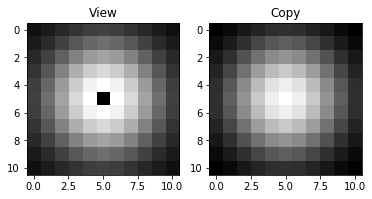

In [9]:
gaussian = itk.gaussian_image_source(size=11, sigma=3, scale=100, mean=[5,5])

arr_view_gaussian = itk.array_view_from_image(gaussian)
arr_gaussian = itk.array_from_image(gaussian)

gaussian.SetPixel([5,5], 0)

plt.subplot(1, 2, 1)
plt.imshow(arr_view_gaussian)
plt.title("View")

plt.subplot(1, 2, 2)
plt.imshow(arr_gaussian)
plt.title("Copy")

### Exercise 2: ITK image to NumPy array

* Read an image with ITK

--

* Convert image to NumPy array as a view
* Modify a pixel in the image
* Has the array been modified?

--

* Convert image to NumPy array as a copy
* Modify a pixel in the image
* Has the array been modified?

### 练习 2: ITK图像转换成NumPy数组

* 使用ITK读取一张图

-- 

* 将图像以View形式转换成NumPy数组
* 改变数组的像素
* 图像是不是被改变了

-- 

* 将图像以copy的形式转换成NumPy数组
* 改变数组的像素
* 图像是不是被改变了

In [10]:
# %load solutions/2_ITK_and_NumPy_answers_Exercise2.py

In [16]:
gaussian = itk.gaussian_image_source(size=11, sigma=3, scale=100, mean=[5,5])

arr_view_gaussian = itk.array_view_from_image(gaussian)
arr_gaussian = itk.array_from_image(gaussian)

print("Pixel in original image: ", gaussian.GetPixel([0,0]))

arr_view_gaussian[0,0] = 1
print("Pixel after view changed: ", gaussian.GetPixel([0,0]))

arr_gaussian[0,0] = 2
print("Pixel after copy changed: ", gaussian.GetPixel([0,0]))

Pixel in original image:  6
Pixel after view changed:  1
Pixel after copy changed:  1


## Templated Types

* Is my ITK type templated? (hint: usually, yes)

## 模板类型

* 我的ITK类型是模板类型吗（通常回答是，是）

In [11]:
help(itk.Image)

Help on itkTemplate in module itkTemplate object:

itk::Image = class itkTemplate(builtins.object)
 |  This class manages access to available template arguments of a C++ class.
 |  
 |  This class is generic and does not give help on the methods available in
 |  the instantiated class. To get help on a specific ITK class, instantiate an
 |  object of that class.
 |  
 |  e.g.: median = itk.MedianImageFilter[ImageType, ImageType].New()
 |        help(median)
 |  
 |  There are two ways to access types:
 |  
 |  1. With a dict interface. The user can manipulate template parameters
 |  similarly to C++, with the exception that the available parameters sets are
 |  chosen at compile time. It is also possible, with the dict interface, to
 |  explore the available parameters sets.
 |  2. With object attributes. The user can easily find the available parameters
 |  sets by pressing tab in interperter like ipython
 |  
 |  Methods defined here:
 |  
 |  GetTypes(self)
 |      Helper method whi

* If so, you need to specify the data type
* This is similar to `dtype` in NumPy

* 因此，你需要指定数据类型
* 和NumPy的`dtype`类似

In [12]:
import numpy
numpy.array([0,0], dtype=numpy.float)

array([0., 0.])

* Define and create a simple object

* 定义和创建一个简单的对象

In [18]:
# A pixel Index is templated over the image dimension
# 首先定义类型然后创建对象
IndexType = itk.Index[3] 
index = IndexType()
print(index)

itkIndex3 ([0, 0, 0])


* Define and use smart pointer object

* 定义和使用智能指针对象

In [21]:
ImageType = itk.Image[itk.ctype('float'), 2]
my_image = ImageType.New()
print(my_image)

Image (0x55d831f3c0d0)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 226
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x55d8324cc2e0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 227
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0
      Container manag

* Print list of available types

* 打印出支持的类型

In [16]:
itk.Image.GetTypes()

<itkTemplate itk::Image>
Options:
  [<itkCType bool>, 2]
  [<itkCType bool>, 3]
  [<itkCType double>, 2]
  [<itkCType double>, 3]
  [<itkCType float>, 2]
  [<itkCType float>, 3]
  [<itkCType signed short>, 2]
  [<itkCType signed short>, 3]
  [<itkCType unsigned char>, 2]
  [<itkCType unsigned char>, 3]
  [<itkCType unsigned long long>, 2]
  [<itkCType unsigned long long>, 3]
  [<itkCType unsigned long>, 2]
  [<itkCType unsigned long>, 3]
  [<itkCType unsigned short>, 2]
  [<itkCType unsigned short>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorF2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVec

## Non-templated Types

* `MetaDataDictionary`

## 非模板类型

* `MetaDataDictionary`

In [19]:
d = itk.MetaDataDictionary()
d['new_key'] = 5
print("'new_key' value: %d" % d['new_key'])

'new_key' value: 5


## Python Sequences for of ITK Objects

* Some ITK objects expect inputs of a certain ITK type. However, it is often more convenient to directly provide Python sequences, i.e. a `list` or `tuple`.

## ITK对象的Python序列

* 一些ITK对象期望某种ITK类型的输入。但是，通常情况下直接使用Python序列，如`list` 或 `tuple`，会更加的方便。

In [22]:
image = ImageType.New()
help(image.SetOrigin)

Help on method itkImageBase2_SetOrigin in module _itkImagePython:

itkImageBase2_SetOrigin(...) method of itkImagePython.itkImageF2 instance
    SetOrigin(itkPointD2 _arg)
    SetOrigin(double const * origin)
    itkImageBase2_SetOrigin(itkImageBase2 self, float const * origin)
    
    Set the origin of the
    image. The origin is the geometric coordinates of the image origin
    (pixel [0,0]). It is stored internally as SpacePrecisionType but may
    be set from float or double. See:   GetOrigin()



* Use a Python `list` where an `itk.Index`, `itk.Point`, or `itk.Vector` is requested.

* 对于`itk.Index`, `itk.Point`, 或 `itk.Vector`类型的地方可以使用Python`list`

In [23]:
image.SetOrigin([2, 10])
print("Image origin: %s" % str(image.GetOrigin()))
print("Image origin: %s" % str(list(image.GetOrigin())))
print("Image origin: %s" % str(tuple(image.GetOrigin())))

Image origin: itkPointD2 ([2, 10])
Image origin: [2.0, 10.0]
Image origin: (2.0, 10.0)


# scikit-learn

* *scikit-learn* is a machine learning package in Python.
* scikit-learn is used to illustrate solving a problem using ITK and *NumPy* arrays.

* *scikit-learn* 是Python的机器学习package
* scikit-learn 用来列举说明如何使用ITK和*NumPy*输出来处理问题。

In [24]:
import sklearn

First, we load 10 2D-images of circles with different radii and center position to which noise has been added and their corresponding ground truth segmentations.

首先，我们加载10幅不同半径和中心位置的圆的二维图像，在图像中加入噪声并进行相应的真值分割。

itkSize2 ([50, 50])


Text(0.5, 1.0, 'Segmentation')

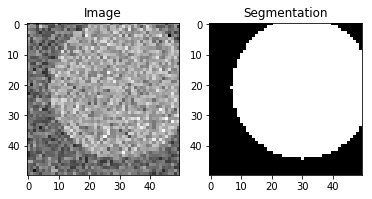

In [25]:
l_label = []
l_image = []

for i in range(0,10):
    image_name = 'data/sklearn/im%d.nrrd' % i
    image = itk.imread(image_name, itk.F)
    array = itk.array_from_image(image)
    l_image.append(array)
    
    label_name = 'data/sklearn/im%d_label.nrrd' % i
    image = itk.imread(label_name, itk.UC)
    array = itk.array_from_image(image)
    l_label.append(array)
    
size = itk.size(image)
print(size)

plt.subplot(1, 2, 1)
plt.imshow(l_image[0])
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(l_label[0])
plt.title("Segmentation")

The goal is to find the segmentation based on the input image.

目标是基于输入图像找到分割的对象。

We create arrays of data:
* X - the input samples
* Y - the target values

我们创建了数据数组：
* X - 输入样本
* Y - 目标值

In [26]:
X0 = l_image[0].flatten()
X = X0

Y = l_label[0].flatten()

for i in range(1,10):
    X = np.concatenate((X, l_image[i].flatten()))
    Y = np.concatenate((Y, l_label[i].flatten()))

* We use a supervised learning methods based on Bayes’ theorem.
* The only information provided to the algorithm is the image intensity value.

* 我们使用基于贝叶斯理论的监督式学习
* 需要提供给算法的唯一输入是图像的强度值

In [27]:
X.shape, Y.shape

((25000,), (25000,))

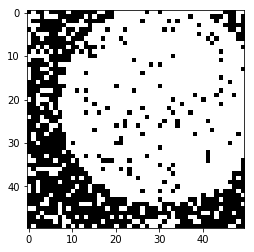

In [28]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X.reshape(-1,1), Y)

result = clf.predict(X0.reshape(-1,1)).reshape(size[0],size[1])
plt.imshow(result)

To improve our segmentation, we filter the input image with a median image filter and add this information as a second sample vector.

ITK is often used to read, reformat, denoise, and augment medical imaging data to improve the effectiveness of medical imaging models.

为了提高我们的分割交过，使用中值滤波对输入图像进行处理。

ITK通常被用来读取，重新格式化，降噪，和增强医学影像数据，来提高医学影像模型的效果。

Text(0.5, 1.0, 'Median Filtered Image')

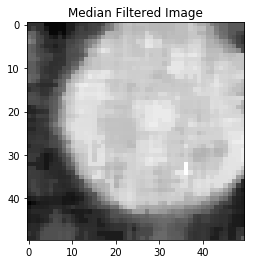

In [29]:
l_median = []
for i in range(0,10):
    image_name = 'data/sklearn/im%d.nrrd' % i
    image = itk.imread(image_name, itk.F)
    
    median=itk.median_image_filter(image, radius=3) # 进行中值滤波
    
    array = itk.array_from_image(median)
    l_median.append(array)
    
plt.gray()
plt.imshow(l_median[0])
plt.title("Median Filtered Image")

In [30]:
M0 = l_median[0].flatten()
M = M0
X0 = np.concatenate((X0.reshape(-1,1),M0.reshape(-1,1)), axis=1)
for i in range(1,10):
    M = np.concatenate((M, l_median[i].flatten()))

X = np.concatenate((X.reshape(-1,1),M.reshape(-1,1)), axis=1)

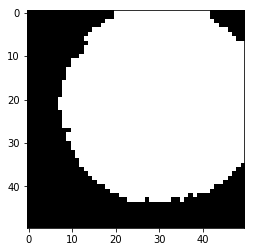

In [31]:
clf.fit(X, Y)
result = clf.predict(X0).reshape(50,50)
plt.imshow(result)

## Typical processing

* Resampling for consistent pixel grid size and spacing
* Image preprocessing
    * Bias field correction, e.g. `n4_bias_field_correction_image_filter`
    * Noise reduction, e.g. `smoothing_recursive_gaussian_image_filter`
    * Feature computation, e.g. texture, wavelet, or edge detector
* Converting ITK data to NumPy and organize the data as needed
* Train classifier
* Use classifier on new data
* Convert classifier result to ITK data
* Apply post processing filters
    * Fill holes, e.g. `binary_fillhole_image_filter`
    * Smoothing, e.g. `median_image_filter`
    
## 典型处理

* 重新采样以获得一致的像素网格大小和间距
* 图像预处理
    * 偏置场校正，如，`n4_bias_field_correction_image_filter`
    * 降噪，如，`smoothing_recursive_gaussian_image_filter`
    * 特征计算，如，texture, wavelet, 或 edge detector
* 将ITK数据转换成NumPy，按需求管理这些数据
* 训练分类器
* 将分类器用到新的数据
* 将分类结果转换成ITK数据
* 应用后处理
    * 补洞，如，`binary_fillhole_image_filter`
    * 平滑，如，`median_image_filter`

## Two ways of using ITK in Python

* Functional programming API
 * *Pythonic*
 * Eager execution
 * More concise
 * A few functions and filters are not available
* Object-oriented way
 * Set up processing pipelines
 * Delayed execution
 * Full access to ITK
 * Conserve memory
   * Optimally re-use and release pixel buffer memory
   * Stream process pipelines in chunks
   
## 在python中使用ITK的两种方式

* 函数式编程API
 * *Pythonic*
 * 可以马上执行
 * 更简洁
 * 一些函数和过滤器不可用
* 面向对象的方式
 * 设置处理管线
 * 延迟执行
 * 对ITK全访问
 * 保存内存
   * 最佳重复使用和释放像素缓冲存储器
   * 成块的流程管道

## Let's start with the Pythonic way

## 让我们开始以Pythonic的方式

In [32]:
image = itk.imread("data/CBCT-TextureInput.png", itk.ctype('float'))

In [33]:
filtered_image = itk.median_image_filter(image, radius = 3)

In [34]:
view(filtered_image, ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Pythonic exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `mean_image_filter`
* Replace filter with `otsu_threshold_image_filter`
* Visualize results

### Pythonic的练习

* 在上面的例子中，改变滤过的半径观察结果
* 使用`mean_image_filter`
* 使用`otsu_threshold_image_filter`
* 显示结果

Uncomment and change the radius of the filter and observe the result.

In [37]:
median_filtered_image = itk.median_image_filter(image, radius = 20)
view(median_filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

In [35]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_median.py

Uncomment and replace filter with `mean_image_filter`

In [39]:
mean_filtered_image = itk.mean_image_filter(image, radius = 5)
view(mean_filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

In [39]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_mean.py

Uncomment and replace filter with `otsu_threshold_image_filter`

In [40]:
otsu_filtered_image = itk.otsu_threshold_image_filter(image)
view(otsu_filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS2; proxy …

In [45]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_otsu.py

## Object-oriented

* Two types of C++ ITK objects
 * Smart pointers (hint: most ITK objects are smart pointers)
 * "Simple" objects
* Translates in two ways of creating objects in Python
 * `obj = itk.SmartPointerObjectType.New()` (use auto-completion to see if `New()` method exists)
 * `obj = itk.SimpleObjectType()`
 
## 面向对象的方式

* C++ ITK对象的两种类型
 * 智能指针（hint：大多数ITK对象都是智能指针）
 * “简单的”对象
* 在Python中以两种方式创建对象
 * `obj = itk.SmartPointerObjectType.New()`（使用自动补全，来看是否存在New函数）
 * `obj = itk.SimpleObjectType()`

## Examples of objects

* With `New()` method:
 * `itk.Image`
 * `itk.MedianImageFilter`
* Without `New()` method:
 * `itk.Index`
 * `itk.RGBPixel`

## 对象的例子

* 使用 `New()` 方法:
 * `itk.Image`
 * `itk.MedianImageFilter`
* 不使用 `New()` 方法:
 * `itk.Index`
 * `itk.RGBPixel`

## Filters with object-oriented syntax

## 基于面向对象格式的滤波

In [41]:
PixelType = itk.ctype('float')
image = itk.imread("data/CBCT-TextureInput.png", PixelType)

ImageType = itk.Image[PixelType, 2]
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(4)
median_filter.Update()
view(median_filter.GetOutput(), ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

### Object-oriented exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `MeanImageFilter`
* Replace filter with `OtsuThresholdImageFilter`
* Visualize results

### 面向对象的练习

* 在上面的例子中，改变radius，观察结果
* 使用`MeanImageFilter`
* 使用 `OtsuThresholdImageFilter`
* 观察结果

Uncomment and change the radius of the filter and observe the result.

In [42]:
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(20)
median_filter.Update()
median_filtered_image = median_filter.GetOutput()
view(median_filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

In [50]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_MedianFilter.py

Uncomment and edit to use `MeanImageFilter`

In [43]:
mean_filter = itk.MeanImageFilter[ImageType, ImageType].New()
mean_filter.SetInput(image)
mean_filter.SetRadius(22)
mean_filter.Update()
mean_filtered_image = mean_filter.GetOutput()
view(mean_filtered_image)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF2; proxy o…

In [54]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_MeanFilter.py

Uncomment and replace filter with `OtsuThresholdImageFilter`

In [46]:
InputImageType = itk.Image[itk.ctype('float'), 2]
OutputImageType = itk.Image[itk.ctype('short'), 2]

otsu_filter = itk.OtsuThresholdImageFilter[InputImageType, OutputImageType].New()
otsu_filter.SetInput(image)
otsu_filter.Update()
view(otsu_filter.GetOutput(),ui_collapsed=True)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS2; proxy …

In [56]:
# %load solutions/2_Using_ITK_in_Python_real_world_filters_OtsuFilter.py

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS2; proxy …

## ITK Object-oriented Summary
* Has `New()` method?
  * Call `Update()` with filters!
  
## ITK面向对象总结
* 是否有`New()`方法
* 调用滤波器的`Update()`

## Supported Image Types

## 支持的图像类型

### Unsupported (image) types

ITK filters have compile-time performance optimized for a specific image types and dimensions.

When an attempt is made to use a filter with an image type that is not supported, a error will occur like:

### 不支持的图像类型

ITK过滤器具有针对特定图像类型和尺寸优化的编译时性能。

当尝试处理不支持的图像类型的时候会报错：

`KeyError: "itkTemplate : No template [<class 'itkImagePython.itkImageD2'>] for the itk::ImageFileReader class"`

In [47]:
image = itk.imread("data/BrainProtonDensitySlice.png", itk.D)
print(image)

TemplateTypeError: itk.ImageFileReader is not wrapped for input type `itk.Image[itk.D,2]`.

To limit the size of the package, only a limited number of
types are available in ITK Python. To print the supported
types, run the following command in your python environment:

    itk.ImageFileReader.GetTypes()

Possible solutions:
* If you are an application user:
** Convert your input image into a supported format (see below).
** Contact developer to report the issue.
* If you are an application developer, force input images to be
loaded in a supported pixel type.

    e.g.: instance = itk.ImageFileReader[itk.Image[itk.UC,2]].New(my_input)

or

    e.g.: image = itk.imread(my_input_filename, itk.F)


* (Advanced) If you are an application developer, build ITK Python yourself and
turned to `ON` the corresponding CMake option to wrap the pixel type or image
dimension you need. When configuring ITK with CMake, you can set
`ITK_WRAP_${type}` (replace ${type} with appropriate pixel type such as
`double`). If you need to support images with 4 or 5 dimensions, you can add
these dimensions to the list of dimensions in the CMake variable
`ITK_WRAP_IMAGE_DIMS`.

Supported input types:

itk.Image[itk.UC,2]
itk.Image[itk.UC,3]
itk.Image[itk.RGBPixel[itk.UC],2]
itk.Image[itk.RGBPixel[itk.UC],3]
itk.Image[itk.RGBAPixel[itk.UC],2]
itk.Image[itk.RGBAPixel[itk.UC],3]
itk.Image[itk.Vector[itk.F,2],2]
itk.Image[itk.Vector[itk.F,2],3]
itk.Image[itk.Vector[itk.F,3],2]
itk.Image[itk.Vector[itk.F,3],3]
itk.Image[itk.Vector[itk.F,4],2]
itk.Image[itk.Vector[itk.F,4],3]
itk.Image[itk.CovariantVector[itk.F,2],2]
itk.Image[itk.CovariantVector[itk.F,2],3]
itk.Image[itk.CovariantVector[itk.F,3],2]
itk.Image[itk.CovariantVector[itk.F,3],3]
itk.Image[itk.CovariantVector[itk.F,4],2]
itk.Image[itk.CovariantVector[itk.F,4],3]
itk.Image[itk.SS,2]
itk.Image[itk.SS,3]
itk.Image[itk.US,2]
itk.Image[itk.US,3]
itk.Image[itk.F,2]
itk.Image[itk.F,3]
itk.Image[itk.complex[itk.F],2]
itk.Image[itk.complex[itk.F],3]
itk.VectorImage[itk.SS,2]
itk.VectorImage[itk.UC,2]
itk.VectorImage[itk.US,2]
itk.VectorImage[itk.F,2]
itk.VectorImage[itk.SS,3]
itk.VectorImage[itk.UC,3]
itk.VectorImage[itk.US,3]
itk.VectorImage[itk.F,3]
itk.Image[itk.Vector[itk.F,8],2]
itk.Image[itk.Vector[itk.F,8],3]
itk.Image[itk.Vector[itk.F,10],2]
itk.Image[itk.Vector[itk.F,10],3]


To find the supported types for a filter, call `.GetTypes()` on the filter. `itk.imread` wraps, the `itk.ImageFileReader` filter.

可以通过调用`.GetTypes()`获取支持的类型

In [25]:
itk.ImageFileReader.GetTypes()

<itkTemplate itk::ImageFileReader>
Options:
  [<class 'itkCoocurrenceTextureFeaturesImageFilterPython.itkImageVF82'>,]
  [<class 'itkCoocurrenceTextureFeaturesImageFilterPython.itkImageVF83'>,]
  [<class 'itkImagePython.itkImageCF2'>,]
  [<class 'itkImagePython.itkImageCF3'>,]
  [<class 'itkImagePython.itkImageCVF22'>,]
  [<class 'itkImagePython.itkImageCVF23'>,]
  [<class 'itkImagePython.itkImageCVF32'>,]
  [<class 'itkImagePython.itkImageCVF33'>,]
  [<class 'itkImagePython.itkImageCVF42'>,]
  [<class 'itkImagePython.itkImageCVF43'>,]
  [<class 'itkImagePython.itkImageF2'>,]
  [<class 'itkImagePython.itkImageF3'>,]
  [<class 'itkImagePython.itkImageRGBAUC2'>,]
  [<class 'itkImagePython.itkImageRGBAUC3'>,]
  [<class 'itkImagePython.itkImageRGBUC2'>,]
  [<class 'itkImagePython.itkImageRGBUC3'>,]
  [<class 'itkImagePython.itkImageSS2'>,]
  [<class 'itkImagePython.itkImageSS3'>,]
  [<class 'itkImagePython.itkImageUC2'>,]
  [<class 'itkImagePython.itkImageUC3'>,]
  [<class 'itkImagePython.

One approach to handle this type of error is is to read the image into a supported pixel type:

处理此类错误的一种方法是将图像读入支持的像素类型：

In [27]:
image = itk.imread("data/KitwareITK.jpg", itk.F)

Another approach is to cast the image to a supported image type:

另一种方法是将图像转换为支持的图像类型：

In [28]:
InputImageType = itk.Image[itk.F, 2]
OutputImageType = itk.Image[itk.UC, 2]
cast_filter = itk.CastImageFilter[InputImageType, OutputImageType].New(image)
cast_filter.Update()

## Appendix

### Functions to know
* `itk.imread(file_name [, pixel_type])`
* `itk.imwrite(image, file_name [, compression])`
* `itk.array_from_image(image)` and `itk.array_view_from_image(image)`
* `itk.image_from_array(arr)` and `itk.image_view_from_array(arr)`

### Pixel types - Two options
* itk.ctype('float'), itk.ctype('unsigned char')
* itk.F, itk.UC

### Convenience functions
* `itk.size(image)`
* `itk.spacing(image)`
* `itk.origin(image)`
* `itk.index(image)`
* `itk.physical_size(image)`

See also: the **[ITK Python Quick Start Guide](https://itkpythonpackage.readthedocs.io/en/latest/Quick_start_guide.html)**

### Enjoy ITK!